In [1]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Splitting & Using XGB


In [5]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

xgb_classifier = xgb.XGBClassifier()

start_time = time.time()
xgb_classifier.fit(X_train, y_train_encoded)
end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

y_pred_encoded = xgb_classifier.predict(X_test)

y_pred = le.inverse_transform(y_pred_encoded)


Training time: 0.12835693359375 seconds


## Using Evaluation Metrics

Accuracy =  96.0093896713615 %
Precision =  0.9328522070457553
Recall =  0.9451169919919921
F1-score =  0.9385528385528384


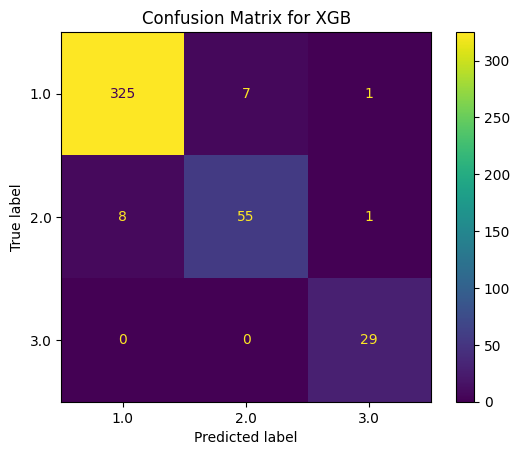

Classification Report
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       333
         2.0       0.89      0.86      0.87        64
         3.0       0.94      1.00      0.97        29

    accuracy                           0.96       426
   macro avg       0.93      0.95      0.94       426
weighted avg       0.96      0.96      0.96       426



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for XGB')
plt.show()

print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [7]:
# # For multiclass

# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize


# y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
# y_scores = xgb_classifier.predict_proba(X_test)

# plt.figure()

# n_classes = 3
# colors = ['b', 'g', 'r']

# for i in range(1, n_classes + 1):
#     fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('(AUC ROC) - Multiclass')
# plt.legend(loc="lower right")
# plt.show()


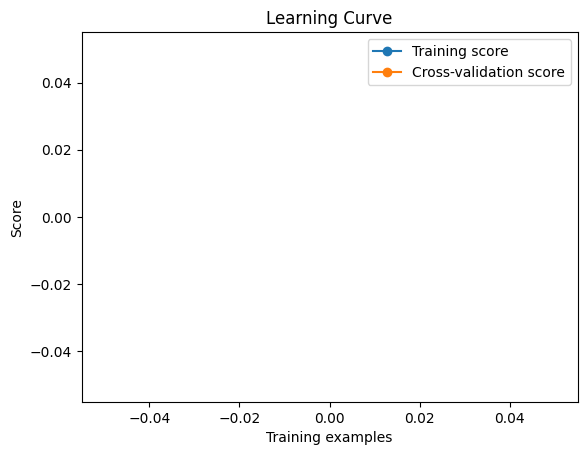

In [8]:
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

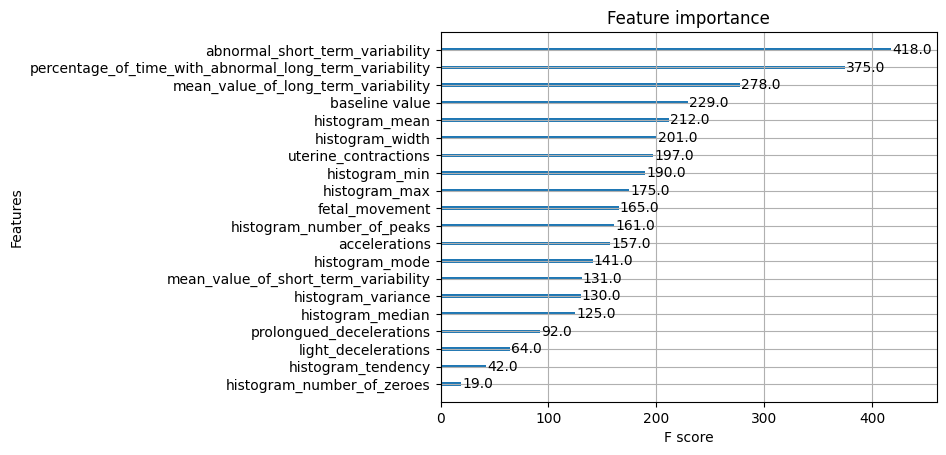

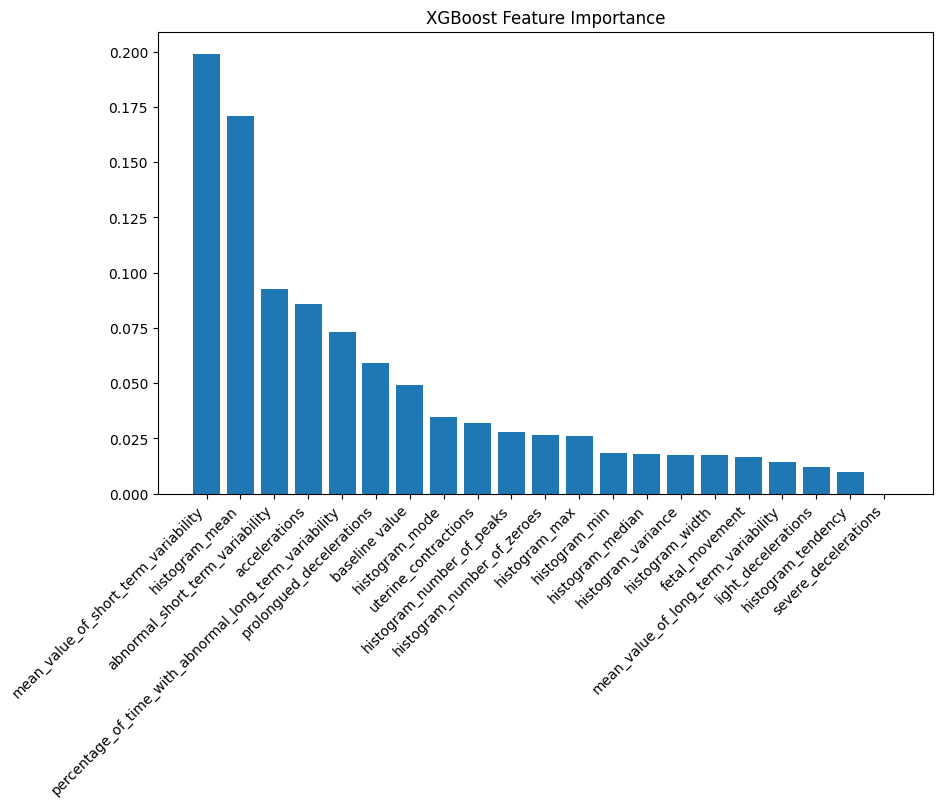

In [9]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb_classifier.fit(X_train, y_train_encoded)

xgb.plot_importance(xgb_classifier)
plt.show()

feature_importance = xgb_classifier.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

# print("Feature importance:")
# for idx in sorted_idx:
#     print(f"{X.columns[idx]}: {feature_importance[idx]}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), X.columns[sorted_idx], rotation=45, ha="right")
plt.title("XGBoost Feature Importance")
plt.show()


In [10]:
top_k_features_indices = sorted_idx[:12]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]

Indices of Important Features: [ 8 17  7  1  9  6  0 16  3 14 15 13]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


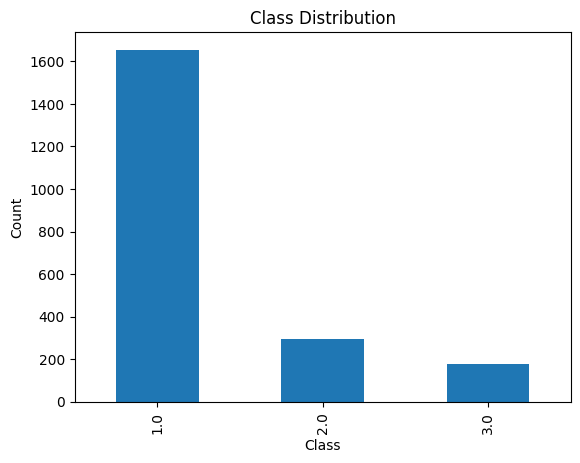

In [11]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [12]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_selected, y)


# print("Feature names during training:", X_resampled.columns)
# print("Feature names in the test set:", X_test.columns)
# X_test_aligned = X_test[X_resampled.columns]
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




In [13]:


# class_distribution = y_resampled.value_counts()

# mean_class_size = class_distribution.mean()
# std_class_size = class_distribution.std()
# imbalance_cv = std_class_size / mean_class_size

# print(f"Class Distribution:\n{class_distribution}")
# print(f"Coefficient of Variation (CV): {imbalance_cv}")

# class_distribution.plot(kind='bar')
# plt.title('Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()


## Using XGB

In [14]:
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

xgb_classifier_after = xgb.XGBClassifier()
# xgb_classifier_after.fit(X_resampled, y_resampled)
xgb_classifier_after.fit(X_resampled, y_resampled_encoded)

# y_pred_encoded = xgb_classifier_after.predict(X_test)

# y_pred_after = le.inverse_transform(y_pred_encoded)
y_pred_full = xgb_classifier_after.predict(X_resampled)
y_pred_test = xgb_classifier_after.predict(X_test)
y_test_converted = y_test - 1

## K fold cv

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-Fold cross-validation
for train_index, val_index in kf.split(X_selected, y):
    X_train_fold, X_val_fold = X_selected.iloc[train_index], X_selected.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Apply SMOTE only on the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled_fold, y_resampled_fold = smote.fit_resample(X_train_fold, y_train_fold)

    # Encode the target variable
    le = LabelEncoder()
    y_resampled_encoded_fold = le.fit_transform(y_resampled_fold)

    # Train the XGBoost classifier
    xgb_classifier_fold = xgb.XGBClassifier()
    xgb_classifier_fold.fit(X_resampled_fold, y_resampled_encoded_fold)

    # Predict on the validation fold
    y_pred_val_encoded = xgb_classifier_fold.predict(X_val_fold)
    y_pred_val = le.inverse_transform(y_pred_val_encoded)

    # Evaluate the model
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_val))
    precision_scores.append(precision_score(y_val_fold, y_pred_val, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, y_pred_val, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_pred_val, average='weighted'))

# Calculate average evaluation metrics
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.9449654791494062
Average Precision: 0.9445940875630164
Average Recall: 0.9449654791494062
Average F1 Score: 0.9445244674471527


## K fold cv

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform Stratified K-Fold cross-validation
for train_index, val_index in skf.split(X_selected, y):
    X_train_fold, X_val_fold = X_selected.iloc[train_index], X_selected.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Apply SMOTE only on the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled_fold, y_resampled_fold = smote.fit_resample(X_train_fold, y_train_fold)

    # Encode the target variable
    le = LabelEncoder()
    y_resampled_encoded_fold = le.fit_transform(y_resampled_fold)

    # Train the XGBoost classifier
    xgb_classifier_fold = xgb.XGBClassifier()
    xgb_classifier_fold.fit(X_resampled_fold, y_resampled_encoded_fold)

    # Predict on the validation fold
    y_pred_val_encoded = xgb_classifier_fold.predict(X_val_fold)
    y_pred_val = le.inverse_transform(y_pred_val_encoded)

    # Evaluate the model
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_val))
    precision_scores.append(precision_score(y_val_fold, y_pred_val, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, y_pred_val, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_pred_val, average='weighted'))

# Calculate average evaluation metrics
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.944026512013256
Average Precision: 0.9444860513101567
Average Recall: 0.944026512013256
Average F1 Score: 0.9438987344304032


## Using Evaluation Metrics

Accuracy (Resampled): 100.0 %
Precision (macro, Resampled): 1.0
Recall (macro, Resampled): 1.0
F1-score (macro, Resampled): 1.0
Confusion Matrix (Resampled):


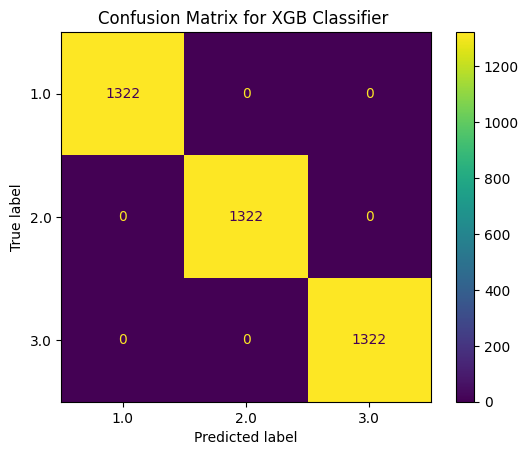

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1322
           1       1.00      1.00      1.00      1322
           2       1.00      1.00      1.00      1322

    accuracy                           1.00      3966
   macro avg       1.00      1.00      1.00      3966
weighted avg       1.00      1.00      1.00      3966

Test Accuracy: 95.07042253521126 %
Test Precision (macro): 0.9093625789104512
Test Recall (macro): 0.9411129879879879
Test F1-score (macro): 0.9244404566877277


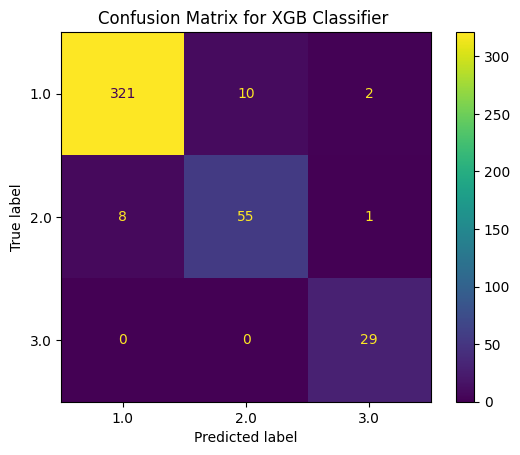

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
# precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
# recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
# f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

# conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
# class_report_resampled = classification_report(y_resampled, y_pred_full)
accuracy_resampled = accuracy_score(y_resampled_encoded, y_pred_full)
precision_resampled = precision_score(y_resampled_encoded, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled_encoded, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled_encoded, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled_encoded, y_pred_full)
class_report_resampled = classification_report(y_resampled_encoded, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled_encoded, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for XGB Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


# test_accuracy = accuracy_score(y_test, y_pred_test)
# test_precision = precision_score(y_test, y_pred_test, average='macro')
# test_recall = recall_score(y_test, y_pred_test, average='macro')
# test_f1 = f1_score(y_test, y_pred_test, average='macro')
# test_conf_matrix = confusion_matrix(y_test, y_pred_test)

test_accuracy = accuracy_score(y_test_converted, y_pred_test)
test_precision = precision_score(y_test_converted, y_pred_test, average='macro')
test_recall = recall_score(y_test_converted, y_pred_test, average='macro')
test_f1 = f1_score(y_test_converted, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test_converted, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test_converted, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for XGB Classifier ')
plt.show()

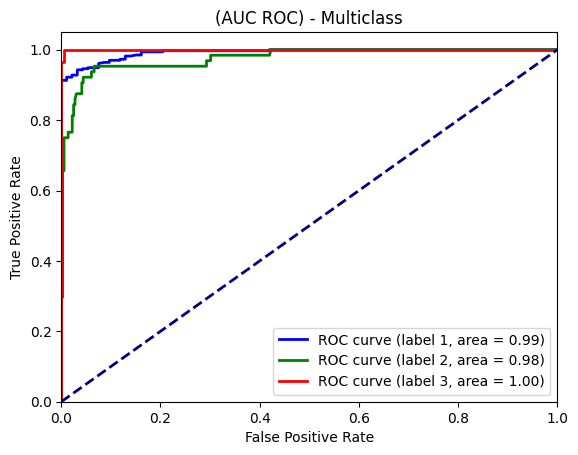

In [18]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = xgb_classifier_after.predict_proba(X_test)


plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


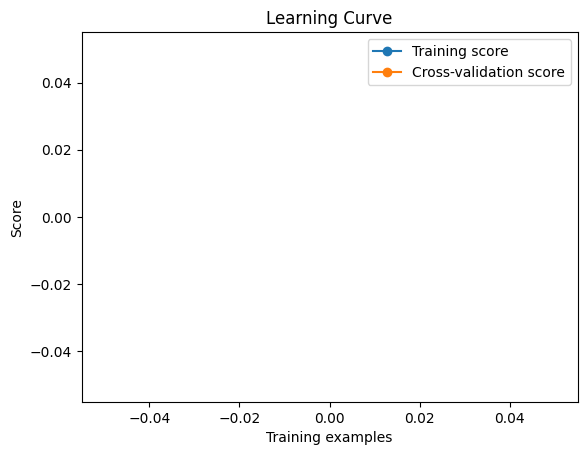

In [19]:
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier_after, X_selected, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

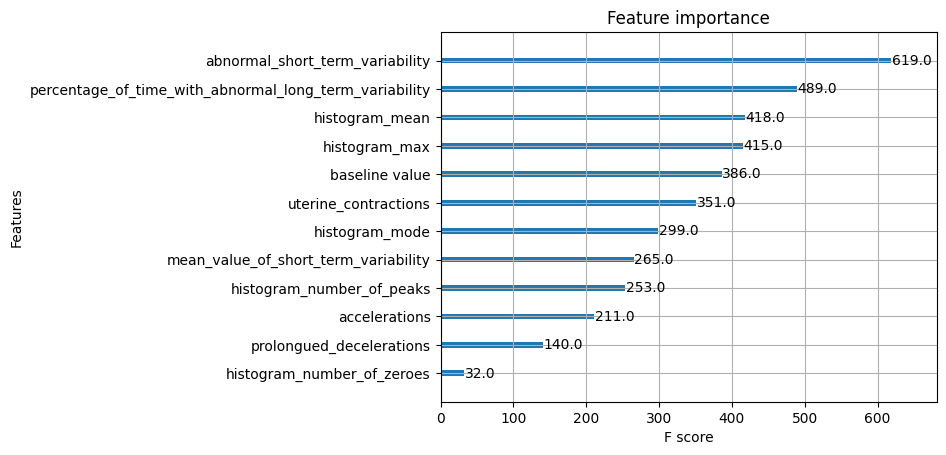

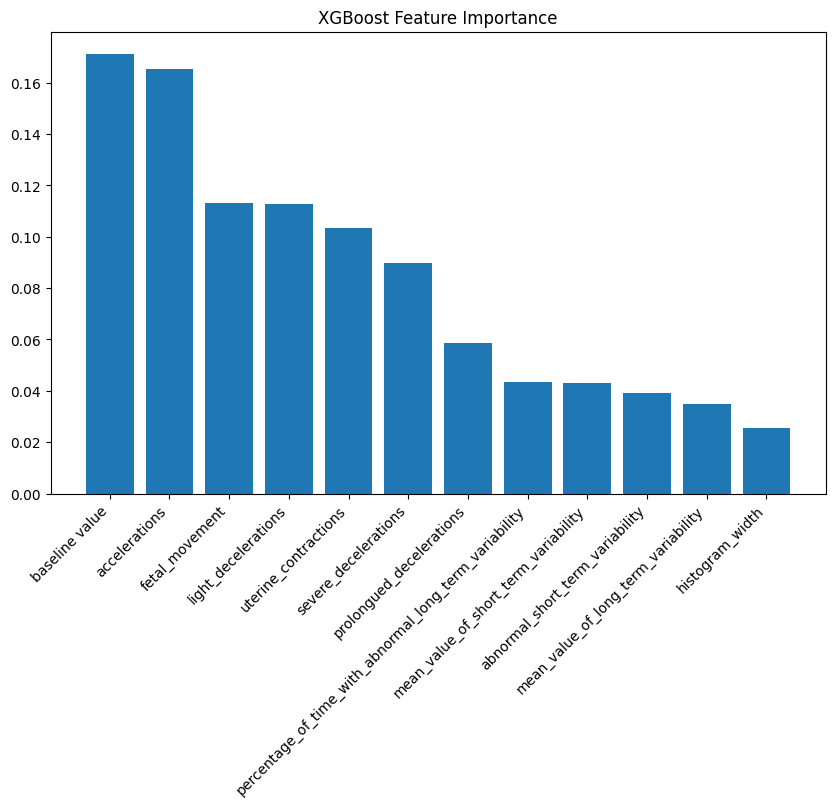

In [20]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb_classifier.fit(X_train, y_train_encoded)

xgb.plot_importance(xgb_classifier)
plt.show()

feature_importance = xgb_classifier.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

# print("Feature importance:")
# for idx in sorted_idx:
#     print(f"{X.columns[idx]}: {feature_importance[idx]}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), X.columns[sorted_idx], rotation=45, ha="right")
plt.title("XGBoost Feature Importance")
plt.show()
